In [4]:
import urllib.request

In [5]:
url = "https://www.naver.com/"

In [7]:
html = urllib.request.urlopen(url)  #네이버에 접속해서 데이터를 가져올 객체생성

b'\n<!doctype html>                 <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb
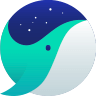
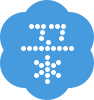

In [8]:
html.read()

### 웹에서 이미지 다운

In [9]:
url = "https://i.pinimg.com/564x/f0/6f/ee/f06fee733a39768b3dc04420f35eca9b.jpg"
#다운받을 이미지,파일,동영상의 url 저장

In [10]:
save_name = "귀여운고양이.jpg"
#url이미지를 저장할 이름

In [11]:
urllib.request.urlretrieve(url, save_name)

('귀여운고양이.jpg', <http.client.HTTPMessage at 0x192ff5565e0>)

### BeautifulSoup으로 스크레이핑하기

In [ ]:
# 라이브러리 읽어들이기
from bs4 import BeautifulSoup
# 분석하고 싶은 HTML
web_page = """
        <html>
            <body>
                <h1>스크레이핑이란?</h1>
                <p>웹페이지를 분석하는 것</p>
                <p>원하는 부분을 추출하는 것</p>
            </body>
        </html>
"""

In [20]:
#html페이지에서 원하는 내용 뽑는 객체 만들기
soup = BeautifulSoup(web_page, 'html.parser') #parser:원하는 내용 뽑는 역할

h1 = soup.html.body.h1
p1 = soup.html.body.p
p2 = p1.next_sibling.next_sibling

print("h1 = " + h1.string)
print("p = " + p1.string)
print("p = " + p2.string)

h1 = 스크레이핑이란?
p = 웹페이지를 분석하는 것
p = 원하는 부분을 추출하는 것


In [21]:
soup


<html>
<body>
<h1>스크레이핑이란?</h1>
<p>웹페이지를 분석하는 것</p>
<p>원하는 부분을 추출하는 것</p>
</body>
</html>

In [22]:
soup.html.body.h1

<h1>스크레이핑이란?</h1>

In [23]:
soup.html.body.h1.string #안의 글자만 출력

'스크레이핑이란?'

In [34]:
soup.html.body.p.string

'웹페이지를 분석하는 것'

In [33]:
soup.html.body.p.next_sibling.next_sibling.string

'원하는 부분을 추출하는 것'

### id로 요소 찾는 법

In [38]:
from bs4 import BeautifulSoup

collect_web_page = '''
<html><body>
  <h1 id="title1">스크레이핑이란?</h1>
  <p id = "body1">웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
  <h1 id="title2">스크레이핑이란??</h1>
  <p id = "body2">웹페이지를 분석하는 것!</p>
  <p>원하는 부분을 추출하는 것!</p>
</body></html>
'''

### find
- find의 특징:id속성이 일치하는 태그(element) 딱 하나 리턴
- id속성이 일치하는 값이 없다면 None리턴

In [39]:
soup = BeautifulSoup(collect_web_page,'html.parser')
title = soup.find(id="title2")
body = soup.find(id="body2")
print("#title=" + title.string)
print("#body=" + body.string)

#title=스크레이핑이란??
#body=웹페이지를 분석하는 것!


### findall
- findall의 특징:id속성이 일치하는 태그(element) 리스트에 담아 리턴

In [42]:
from bs4 import BeautifulSoup
web_page_collect = '''
<html>
    <body>
        <ul class="greet">
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
        <ul class="reply">
            <li>ok</li>
            <li>no</li>
            <li>sure</li>
        </ul>
        <div>
            <ul>
                <li>open</li>
                <li>close</li>
            </ul>
        </div>
    </body>
</html>
    
'''

In [53]:
soup = BeautifulSoup(web_page_collect,"html.parser")
soup


<html>
<body>
<ul class="greet">
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>
<ul class="reply">
<li>ok</li>
<li>no</li>
<li>sure</li>
</ul>
<div>
<ul>
<li>open</li>
<li>close</li>
</ul>
</div>
</body>
</html>

## 실습

### find

In [55]:
soup.find('div')

<div>
<ul>
<li>open</li>
<li>close</li>
</ul>
</div>

In [56]:
ls=soup.find('ul')
ls

<ul class="greet">
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>

In [57]:
ls.text
print(ls.text)


hello
bye
welcome



### findAll

In [59]:
lis=soup.findAll('li') #모든 li를 다 찾고싶다
print(type(lis)) #모든 li가 리스트로 출력된다
print(lis) #모든 li가 출력

for item in lis:
    print(item)

print(lis[0].text)
print(lis[1].text)

for item in lis:
    print(item.text)

<class 'bs4.element.ResultSet'>
[<li>hello</li>, <li>bye</li>, <li>welcome</li>, <li>ok</li>, <li>no</li>, <li>sure</li>, <li>open</li>, <li>close</li>]
<li>hello</li>
<li>bye</li>
<li>welcome</li>
<li>ok</li>
<li>no</li>
<li>sure</li>
<li>open</li>
<li>close</li>
hello
bye
hello
bye
welcome
ok
no
sure
open
close


In [61]:
soup.findAll('li')

[<li>hello</li>,
 <li>bye</li>,
 <li>welcome</li>,
 <li>ok</li>,
 <li>no</li>,
 <li>sure</li>,
 <li>open</li>,
 <li>close</li>]

In [62]:
for item in lis:
    print(item)

<li>hello</li>
<li>bye</li>
<li>welcome</li>
<li>ok</li>
<li>no</li>
<li>sure</li>
<li>open</li>
<li>close</li>


In [64]:
for item in lis:
    print(item.text) #.text나 .string을 쓰면 안의 문자만 나온다.

hello
bye
welcome
ok
no
sure
open
close


In [65]:
print(lis[0].text)
print(lis[1].text)

hello
bye


In [67]:
for item in soup.findAll('li'):
    print('item.text = ',item.text)
    print('item.string = ',item.text)
    print('='*30)
#.text나 .string을 쓰면 안의 문자만 나온다.

item.text =  hello
item.string =  hello
item.text =  bye
item.string =  bye
item.text =  welcome
item.string =  welcome
item.text =  ok
item.string =  ok
item.text =  no
item.string =  no
item.text =  sure
item.string =  sure
item.text =  open
item.string =  open
item.text =  close
item.string =  close


In [71]:
#ul태그이면서 class속성이 reply인 태그에 포함된 li들
#속성은 딕셔너리에 넣음
soup.find('ul',{'class':'reply'}).findAll('li')

[<li>ok</li>, <li>no</li>, <li>sure</li>]

In [75]:
for item in soup.find('ul',{'class':'reply'}).findAll('li'):
    print('item =', item)
    print('item.text = ',item.text)
    print('@'*30)

item = <li>ok</li>
item.text =  ok
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
item = <li>no</li>
item.text =  no
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
item = <li>sure</li>
item.text =  sure
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


### 진짜 웹페이지로 실습

b'\n<!doctype html>                 <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb
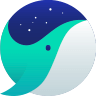
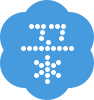

In [87]:
import urllib.request
import bs4

url = 'https://www.naver.com/'
html = urllib.request.urlopen(url)
html.read()


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
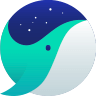
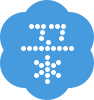

In [22]:
import urllib.request
import bs4
url = 'https://www.naver.com/'
html = urllib.request.urlopen(url)
soup = bs4.BeautifulSoup(html,"html.parser")
print(soup)

b'\n<!doctype html>                 <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb
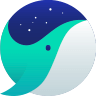
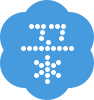

In [79]:
import urllib.request
import bs4

url = 'https://www.naver.com/'
html = urllib.request.urlopen(url)
naver_webpage = html.read()
naver_webpage

In [24]:
import urllib.request

import bs4


url = 'https://www.naver.com/'

html = urllib.request.urlopen(url)


soup = bs4.BeautifulSoup(html,'html.parser')

soup.find("ul",{"class":"type_fix"})



<ul class="list_nav type_fix">
<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>
<li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.shopping" href="https://shopping.naver.com/">쇼핑</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
<li class="nav_item">
<a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
</li>
</ul>

In [92]:
soup.find("ul",{"class":"type_fix"}).findAll("li")

[<li class="nav_item">
 <a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
 </li>,
 <li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>,
 <li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>,
 <li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>,
 <li class="nav_item"><a class="nav" data-clk="svc.shopping" href="https://shopping.naver.com/">쇼핑</a></li>,
 <li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>,
 <li class="nav_item">
 <a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>
 </li>]

In [95]:
for item in soup.find("ul",{"class":"type_fix"}).findAll("li"):
    print("item.sting = ", item.string)
    print("#"*30)

item.sting =  None
##############################
item.sting =  카페
##############################
item.sting =  블로그
##############################
item.sting =  지식iN
##############################
item.sting =  쇼핑
##############################
item.sting =  Pay
##############################
item.sting =  None
##############################


In [97]:
### string과 text의 차이
'''   
    li(엔터) 
    글씨
이런 구조일 때 
.string을 하면 None 출력
.text를 하면 글씨 출력
'''

'   li\n엔터 글씨\n이런 구조일 때 .string을 하면 None 출력\n               .text를 하면 글씨 출력'

In [96]:
for item in soup.find("ul",{"class":"type_fix"}).findAll("li"):
    print("item.text = ", item.text)
    print("#"*30)

item.text =  
메일

##############################
item.text =  카페
##############################
item.text =  블로그
##############################
item.text =  지식iN
##############################
item.text =  쇼핑
##############################
item.text =  Pay
##############################
item.text =  
TV

##############################


In [4]:
import urllib.request as req
from bs4 import BeautifulSoup

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date='
wpage = urllib.request.urlopen(url)
html = req.urlopen(url)
soup = BeautifulSoup(wpage,'html.parser')

In [5]:
titleOfMovie = soup.findAll('td',{"class":"title"})
titleOfMovie

[<td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=17170" title="레옹">레옹</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154573" title="다시 태어나도 우리">다시 태어나도 우리</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=35187" title="피아니스트">피아니스트</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=14448" title="패왕별희 디 오리지널">패왕별희 디 오리지널</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=196051" title="극장판 귀멸의 칼날: 무한열차편">극장판 귀멸의 칼날: 무한열차편</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=184517" title="소울">소울</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=189075" title="자산어보">자산어보</a>
 </div>
 </td>,
 <td class="title">
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10670" titl

In [16]:
import urllib.request as req
from bs4 import BeautifulSoup

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date='
wpage = urllib.request.urlopen(url)
html = req.urlopen(url)
soup = BeautifulSoup(wpage,'html.parser')

titleOfMovie = soup.findAll('div',{"class":"tit5"})
print(titleOfMovie)

[<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=17170" title="레옹">레옹</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=154573" title="다시 태어나도 우리">다시 태어나도 우리</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=35187" title="피아니스트">피아니스트</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=14448" title="패왕별희 디 오리지널">패왕별희 디 오리지널</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=196051" title="극장판 귀멸의 칼날: 무한열차편">극장판 귀멸의 칼날: 무한열차편</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=184517" title="소울">소울</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=189075" title="자산어보">자산어보</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=10670" title="천녀유혼">천녀유혼</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=192066" title="소년시절의 너">소년시절의 너</a>
</div>, <div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=76309" title="플립">플립</a>
</div>, <div class="tit5

In [19]:
import urllib.request as req
from bs4 import BeautifulSoup

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date='
wpage = urllib.request.urlopen(url)
html = req.urlopen(url)
soup = BeautifulSoup(wpage,'html.parser')
title = []
for item in titleOfMovie:
    title.append(item.find('a').string)
title

['레옹',
 '다시 태어나도 우리',
 '피아니스트',
 '패왕별희 디 오리지널',
 '극장판 귀멸의 칼날: 무한열차편',
 '소울',
 '자산어보',
 '천녀유혼',
 '소년시절의 너',
 '플립',
 '우리들',
 '해피 투게더',
 '영웅본색',
 '파수꾼',
 '라야와 마지막 드래곤',
 '명탐정 코난: 비색의 탄환',
 '룸',
 '영웅본색 2',
 '남매의 여름밤',
 '더 박스',
 '시',
 '러브 액츄얼리',
 '중경삼림',
 '아무도 모른다',
 '이별의 아침에 약속의 꽃을 장식하자',
 '리틀 포레스트',
 '소공녀',
 '화양연화',
 '찬실이는 복도 많지',
 '죽여주는 여자',
 '벌새',
 '우리집',
 '진짜로 일어날지도 몰라 기적',
 '건축학개론',
 '늑대소년',
 '플로리다 프로젝트',
 '노바디 ',
 '노예 12년',
 '세자매',
 '블루 재스민',
 '스틸 앨리스',
 '아틱',
 '패터슨',
 '고질라 VS. 콩',
 '팅커 테일러 솔저 스파이',
 '테넷',
 '문라이즈 킹덤',
 '더 테이블',
 '날씨의 아이',
 '너는 여기에 없었다']

In [20]:
pontOfMovie = soup.findAll('td',{"class":"point"})
points = []
for p in pontOfMovie:
    points.append(p.string)
points

['9.38',
 '9.35',
 '9.33',
 '9.32',
 '9.31',
 '9.30',
 '9.29',
 '9.29',
 '9.27',
 '9.27',
 '9.26',
 '9.20',
 '9.18',
 '9.18',
 '9.15',
 '9.04',
 '9.01',
 '8.97',
 '8.95',
 '8.94',
 '8.93',
 '8.93',
 '8.93',
 '8.87',
 '8.86',
 '8.82',
 '8.78',
 '8.78',
 '8.77',
 '8.75',
 '8.75',
 '8.71',
 '8.70',
 '8.67',
 '8.65',
 '8.64',
 '8.63',
 '8.57',
 '8.55',
 '8.48',
 '8.47',
 '8.31',
 '8.29',
 '8.27',
 '8.21',
 '8.17',
 '8.11',
 '8.01',
 '7.95',
 '7.82']

In [21]:
for i in range(0,len(title)):
    print( str(i+1) + ":" + title[i] + "(" + points[i] + ")")

1:레옹(9.38)
2:다시 태어나도 우리(9.35)
3:피아니스트(9.33)
4:패왕별희 디 오리지널(9.32)
5:극장판 귀멸의 칼날: 무한열차편(9.31)
6:소울(9.30)
7:자산어보(9.29)
8:천녀유혼(9.29)
9:소년시절의 너(9.27)
10:플립(9.27)
11:우리들(9.26)
12:해피 투게더(9.20)
13:영웅본색(9.18)
14:파수꾼(9.18)
15:라야와 마지막 드래곤(9.15)
16:명탐정 코난: 비색의 탄환(9.04)
17:룸(9.01)
18:영웅본색 2(8.97)
19:남매의 여름밤(8.95)
20:더 박스(8.94)
21:시(8.93)
22:러브 액츄얼리(8.93)
23:중경삼림(8.93)
24:아무도 모른다(8.87)
25:이별의 아침에 약속의 꽃을 장식하자(8.86)
26:리틀 포레스트(8.82)
27:소공녀(8.78)
28:화양연화(8.78)
29:찬실이는 복도 많지(8.77)
30:죽여주는 여자(8.75)
31:벌새(8.75)
32:우리집(8.71)
33:진짜로 일어날지도 몰라 기적(8.70)
34:건축학개론(8.67)
35:늑대소년(8.65)
36:플로리다 프로젝트(8.64)
37:노바디 (8.63)
38:노예 12년(8.57)
39:세자매(8.55)
40:블루 재스민(8.48)
41:스틸 앨리스(8.47)
42:아틱(8.31)
43:패터슨(8.29)
44:고질라 VS. 콩(8.27)
45:팅커 테일러 솔저 스파이(8.21)
46:테넷(8.17)
47:문라이즈 킹덤(8.11)
48:더 테이블(8.01)
49:날씨의 아이(7.95)
50:너는 여기에 없었다(7.82)
